In [2]:
# for assigment week 3
import os
os.listdir()


'''
Key features of the project
                    1: Map representation
                    2: Interest from the choices -- Tech business, economics, event lists 
                    3. Taste for restaurants, Italian , Fast food , Coffee
user inputs:
    1. City name
    2. name of food or venues that can be from from foursquare.com

'''

['.git',
 '.ipynb_checkpoints',
 'fixed.csv',
 'fixedwithll.csv',
 'Geospatial_Coordinates.csv',
 'machinelearningcapstone.ipynb',
 'nb_001.ipynb',
 'nb_002.ipynb',
 'nb_003.ipynb',
 'README.md',
 'T120120190818063237.CSV',
 'zip.csv']

In [255]:
#importing libraries
import pandas as pd
import requests as rq
import folium
import httplib2
import json

#access my local csv file
df = pd.read_csv('fixedwithll.csv')

Here I am going to add some clustering by geographic location
    Notice: it can many featured data set but I used it only two feature dataset
    
From now on I am try to show how to use kmeans algorithm from sklearn library
but I just try to use in on the coordinates of my df 
    

In [252]:
#import useful libraries

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#slice my original dataframe

data = df[['Latitude', 'Longitude']]
# data transformation preparation
X = data.values[:, :]
# then transform using StandardScaler
cluster = StandardScaler().fit_transform(X)

# if you want to you do this in different cells and run it 
# then declaring my KMeans object with 4 clusters I can choose what ever I want


kmeans = KMeans(init = 'k-means++', n_clusters = 4, n_init=12)
# now fitting
kmeans.fit(cluster)

# getting result labels after fitting my data set
# it will be 0, 1, 2, 3
labels = kmeans.labels_

# then append it to my original data frame with column name Cluster

df['Cluster'] = labels

# if i can see the centers of kmeans
#kmeans.cluster_centers_

# then get center by grouping the by Cluster
center = df.groupby('Cluster').mean()


#print(center)
center= center.reset_index()
center =center.drop(['Cluster'], axis = 1) # since I have just did resetindex in order
# to see all useful column and rows in my center df

center.to_csv('center.csv', index=False)# finally i am making file called center.csv
center

,Latitude,Longitude
0,43.655559,-79.523593
1,43.742853,-79.459731
2,43.670195,-79.375949
3,43.766657,-79.273543


In [253]:

"""
This is critical cell that I have to delete important informations be
like api key before submission even commit to git hub.

"""

meetupurl = ''
meetupapi_key = ''
meetupclientsec = ''
evenbrite = ''
eventbriteurl = '' # for purpose of listing popular events near him in his industry
fsclient_d = ''
fsclient_secret = ''
googlekey= ''


# Caution googlemap api request has price to pay

In [256]:
# google geolocation findte

# now this stage for connecting to the API websites to access my data
# for user 
#
cityname = input("Which city are you in, input city name : ")
def getGeocodeLocation(inputString, google_api_key):
    locationString = inputString.replace(" ", "+")
    url = ('https://maps.googleapis.com/maps/api/geocode/json?address=%s&key=%s'%(locationString, google_api_key))
    h = httplib2.Http()
    response, content = h.request(url, 'GET')
    result = json.loads(content)
    lat =result['results'][0]['geometry']['location']['lat']
    long = result['results'][0]['geometry']['location']['lng']
    return [lat, long]
loccoors = getGeocodeLocation(cityname, googlekey)
print(loccoors)


Toronto
[43.653226, -79.3831843]


In [5]:
df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront;Regent Park,43.654260,-79.360636
3,M6A,North York,Lawrence Heights;Lawrence Manor,43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494


In [259]:
keyword = input("What do you want to seach, Coffee, Restauran? : ")
def getfromfoursquare(cid, csec, loca, whattosearch):
    url = 'https://api.foursquare.com/v2/venues/search?'
    params = dict(
      client_id=cid,
      client_secret=csec,
      v='20180323',
      ll='{},{}'.format(loca[0], loca[1]),
      query=whattosearch,
      limit=15
    )
    return rq.get(url, params= params).json()['response']['venues']
results = getfromfoursquare(fsclient_d, fsclient_secret, loccoors, keyword)
print("Thank you!")

What do you want to seach, Coffee, Restauran? : Coffe
Thank you!


In [260]:
def getfromevenbrite(evenbrite, city):
    params = {'token':evenbrite, 'location.within':'4km', 'location.address':city}
    url = 'https://www.eventbriteapi.com/v3/events/search?'
    
    result = rq.get(url, params=params)
    return result.json()
page = getfromevenbrite(evenbrite, cityname)
# now getting events then I will display the name and 

# eventbrite response structure
'''
first from pagination, events, location
choose events-- there is event lists
choose keys = [name, description, id, start, end, organization_id]

'''




'\nfirst from pagination, events, location\nchoose events-- there is event lists\nchoose keys = [name, description, id, start, end, organization_id]\n\n'

In [261]:
centers= pd.read_csv('center.csv')
centers.head()

,Latitude,Longitude
0,43.766657,-79.273543
1,43.744489,-79.457073
2,43.669725,-79.374010
3,43.660021,-79.519620


In [262]:
'''accessing it first put index of element 0== , 
name, 
[location][address], 
[location][lat]
[location][long], 




'''


def infofsq(digger):
    '''this function return diction with four key called Name, Address, latitude, Longitude'''
    venuesdic ={'Name':[], 'Address':[], 'Latitude':[], 'Longitude':[],'neighborhood':[]}
    for i in range(len(digger)):
        venuesdic['Name'].append(digger[i]['name'])
        venuesdic['Address'].append(digger[i]['location']['formattedAddress'][0]+digger[0]['location']['formattedAddress'][1])
        venuesdic['Latitude'].append(digger[i]['location']['lat'])
        venuesdic['Longitude'].append(digger[i]['location']['lng'])
        #venuesdic['neighborhood'].append(digger[i]['location']['neighborhood'])

    return venuesdic
#digger[0]['name']
fsdict = infofsq(results)


In [246]:
# Im just randomly going to down town toronto to make folium Map object
print('Events in 4 km radius\n\t---------\t')

for i in range(5):
    print(i+1)
    print('Name: \t\t',page['events'][i]['name']['text'])
    print('Id:\t\t',page['events'][i]['id'])
    print('Start time:\t ',page['events'][i]['start']['local'])
    print('Is it free\t\t', page['events'][i]['is_free'])
    print('website:\t\t', page['events'][i]['url'])
    print('\t******\t')


mapofc = folium.Map([df['Latitude'][2], df['Longitude'][2]], zoom_start=13)
mapofc

for i in range(len(df)):
    folium.Marker([df['Latitude'][i], df['Longitude'][i]], tooltip = df['Borough'][i]).add_to(mapofc)

'''Above printed events radius in the map from eventbride'''
folium.vector_layers.Circle(loccoors, popup = cityname, radius = 4000).add_to(mapofc)
 
folium.map.LayerControl().add_to(mapofc)
'adds specific places to the map'
for i in range(len(fsdict)):
    coord = [fsdict['Latitude'][i], fsdict['Longitude'][i]]
    name = fsdict['Name'][i]
    #folium.vector_layers.Rectangle(coord, popup='Name').add_to(mapofc)
    folium.vector_layers.CircleMarker(coord, radius =10, tooltip = name, fill_color = '00bfff').add_to(mapofc)
for i in range(len(centers)):
    latti = centers['Latitude'][i]
    longi = centers['Longitude'][i]
    folium.vector_layers.Circle([latti, longi], tooltip = 'Cluster {}'.format(i), radius = 5300, color = '#006400').add_to(mapofc)
    folium.vector_layers.CircleMarker([latti, longi],tooltip = 'Cluster {}'.format(i), color = '00bfff', fill_color = '#00FF00').add_to(mapofc)

mapofc


Events in 4 km radius
	---------	
1
Name: 		 London Home Show Autumn 2019
Id:		 65162343323
Start time:	  2019-09-21T11:00:00
Is it free		 True
website:		 https://www.eventbrite.co.uk/e/london-home-show-autumn-2019-tickets-65162343323?aff=ebapi
	******	
2
Name: 		 REVIVE UK, LONDON | DANIEL CHAND (7NIGHTS)
Id:		 50380175461
Start time:	  2019-09-22T18:30:00
Is it free		 False
website:		 https://www.eventbrite.co.uk/e/revive-uk-london-daniel-chand-7nights-tickets-50380175461?aff=ebapi
	******	
3
Name: 		 The Gin & Rum Festival - London - 2019
Id:		 51512194360
Start time:	  2019-08-23T18:30:00
Is it free		 False
website:		 https://www.eventbrite.co.uk/e/the-gin-rum-festival-london-2019-tickets-51512194360?aff=ebapi
	******	
4
Name: 		 Black Girl Fest 2019 
Id:		 55465615148
Start time:	  2019-10-12T10:00:00
Is it free		 False
website:		 https://www.eventbrite.co.uk/e/black-girl-fest-2019-tickets-55465615148?aff=ebapi
	******	
5
Name: 		 Run the River 2019
Id:		 62583089706
Start time:	 

In [11]:
#it will be continued

#for more information about the toronto from wikipedia

In [265]:
#getting web content
wikicontent = rq.get('https://en.wikipedia.org/wiki/Demographics_of_Toronto').content

In [266]:
frames = pd.read_html(wikicontent)

In [268]:

#processing to get table structure i want to get
framesdf = []
for i in frames:
    framesdf.append(i)
f = frames[9:17]


In [269]:
# extraction populations of toronto if needed

population = []
sectornames = []
for i in f:
    population+=list(i['Population'][0:])
    sectornames+=list(i['Riding'][0:])
#population
#sectornames
popdf = pd.DataFrame({'Riding': sectornames, 'Population':population})


In [270]:
popdf.head()

,Riding,Population
0,Spadina-Fort York,114315
1,Beaches-East York,108435
2,Davenport,107395
3,Parkdale-High Park,106445
4,Toronto-Danforth,105395


In [275]:
popdf.index = popdf.Riding

Now I am making final histogram for Toronto population by Riding

In [279]:
import matplotlib.pyplot as plt
popdf = popdf.drop(['Riding'], axis = 1)

Text(0.5, 1.0, 'Toronto Population Bar chart')

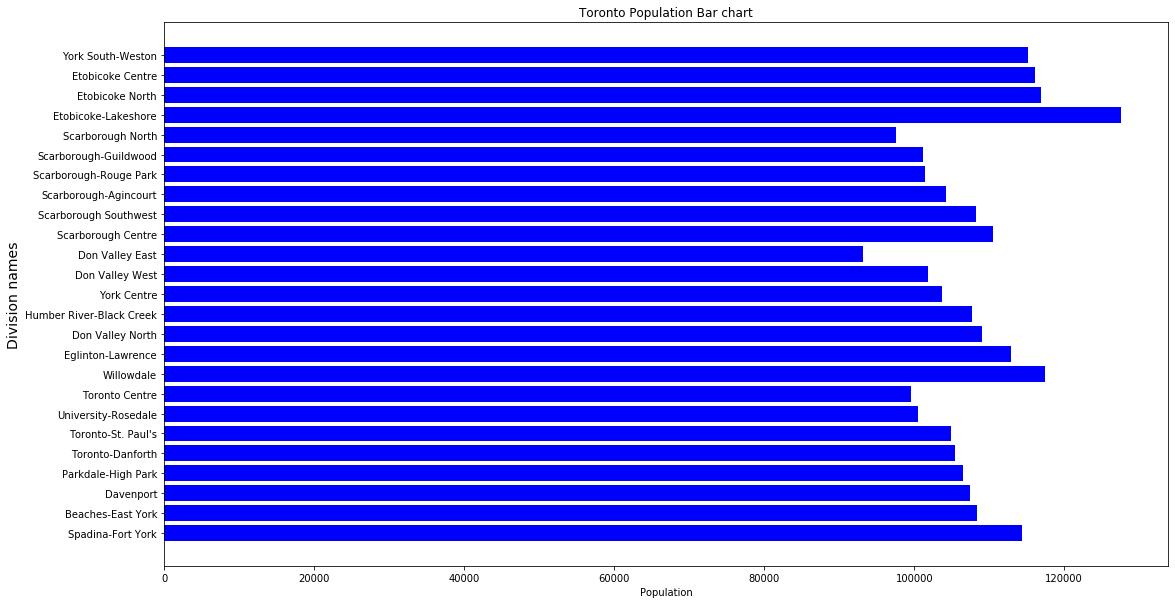

In [301]:
fig = plt.subplots(figsize=(18, 10))
plt.barh(popdf.index, popdf["Population"],  color = 'blue')

plt.ylabel('Division names', fontsize =14)
plt.xlabel('Population')
plt.title("Toronto Population Bar chart")



# thank you so much for participation!